In [1]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Project root added to sys.path:", project_root)

Project root added to sys.path: c:\Users\mateo\Desktop\MCEM\new\Nouveau dossier\Simulation_Project


In [2]:
## Import Packages 
import pandas as pd
import matplotlib.pyplot as plt
import os 
from data_loader import DataLoader
from preprocessor import DataPreprocessor
from fuel_and_tire_model import FuelAndTireModel

In [3]:
db_path = os.path.join(project_root,"data", "F1_timingdata_2014_2019.sqlite")
loader = DataLoader(db_path)
raw_data = loader.load_data()

In [4]:
# Keep only needed columns for modeling
required_columns = {
    "laps": ["driver_id", "race_id", "lapno", "laptime", "compound", "tireage", "pitintime"],
    "races": ["id", "season", "location"],
    "starterfields": ["race_id", "driver_id", "status"],
    "qualifyings": ["race_id", "driver_id", "q1laptime", "q2laptime", "q3laptime"],
    "fcyphases": ["race_id", "startlap", "endlap"]
}

preprocessor = DataPreprocessor(required_columns)
cleaned_data = preprocessor.preprocess(raw_data)


In [5]:
# Set up model for one driver / season / race
driver_id = 3
season = 2016
race_id = 46  


In [6]:
# Modeling
model = FuelAndTireModel(season=season, driver_id=driver_id, race_id=race_id, dataframes=cleaned_data)
model.fit()
predictions = model.predict(model.test_data)

# Combine actual vs predicted
df_result = model.test_data.copy()
df_result["predicted"] = predictions


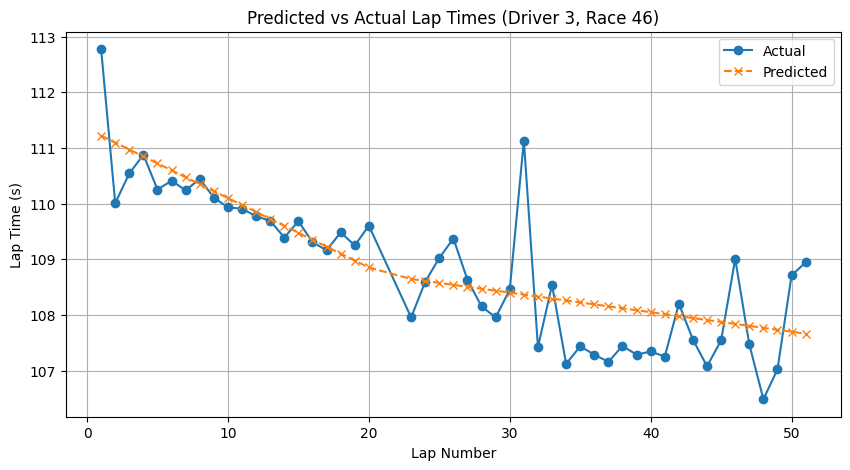

In [7]:
# Plot actual vs predicted lap times
plt.figure(figsize=(10, 5))
plt.plot(df_result["lapno"], df_result["laptime"], marker='o', label="Actual")
plt.plot(df_result["lapno"], df_result["predicted"]+ df_result["best_qualif_time"], marker='x', linestyle="--", label="Predicted")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time (s)")
plt.title(f"Predicted vs Actual Lap Times (Driver {driver_id}, Race {race_id})")
plt.legend()
plt.grid(True)
plt.show()